<a href="https://colab.research.google.com/github/GrainSack/GrainSack/blob/sub1/Ifel_super_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Enumerate

In [ ]:
my_list = ['a','b','c','d']

for i, value in enumerate(my_list):
    print("순번 : ", i, " , 값 : ", value)

순번 :  0  , 값 :  a
순번 :  1  , 값 :  b
순번 :  2  , 값 :  c
순번 :  3  , 값 :  d


# List comprehension

In [ ]:
my_list = ['a','b','c','d']

result_list = [(i, j) for i in range(3) for j in my_list]

print(result_list)

[(0, 'a'), (0, 'b'), (0, 'c'), (0, 'd'), (1, 'a'), (1, 'b'), (1, 'c'), (1, 'd'), (2, 'a'), (2, 'b'), (2, 'c'), (2, 'd')]


# Generator(yield)

In [ ]:
my_list = ['a','b','c','d']

# 인자로 받은 리스트로부터 데이터를 하나씩 가져오는 제너레이터를 리턴하는 함수
def get_dataset_generator(my_list):
    for i in range(2):
        for j in my_list:
            yield (i, j)   # 이 줄이 이전의 append 코드를 대체했습니다
            print('>>  1 data loaded..')

dataset_generator = get_dataset_generator(my_list)
for X, y in dataset_generator:
    print(X, y)

print(f'메모리 사용량 : {sys.getsizeof(dataset_generator)}')

# Multipreocessing
- pool.map(count, num_list) : 병렬화를 시키는 함수로, count 함수에 num_list의 원소들을 하나씩 넣어 놓습니다. 여기서 num_list의 원소는 4개이므로 4개의 count 함수에 각각 하나씩 원소가 들어가게 됩니다.
즉, count('p1'), count('p2'), count('p3'), count('p4')가 만들어집니다.
- pool.close() : 일반적으로 병렬화 부분이 끝나면 나옵니다. 더 이상 pool을 통해서 새로운 작업을 추가하지 않을 때 사용합니다.
- pool.join() : 프로세스가 종료될 때까지 대기하도록 지시하는 구문으로써 병렬처리 작업이 끝날 때까지 기다리도록 합니다.


In [ ]:
import multiprocessing
import time

num_list = ['p1','p2', 'p3', 'p4']
start = time.time()

def count(name):
    time.sleep(5)
    print("finish:"+name+"\n")
    

if __name__ == '__main__':
    pool = multiprocessing.Pool(processes = 2)
    pool.map(count, num_list)
    pool.close()
    pool.join()

print("time :", time.time() - start)

finish:p1
finish:p2


finish:p3

finish:p4

time : 10.080020666122437


# Dice

In [ ]:
class FunnyDice:
    def __init__(self, n=6):
        self.n = int(n)
        self.numbers = list(range(1, n+1))
        self.index = randrange(0, self.n)
        self.val = self.numbers[self.index]

    def throw(self):
        self.index = randrange(0, self.n)
        self.val = self.numbers[self.index]

    def getval(self):
        return self.val

    def setval(self, val):
        if val <= self.n:
            self.val = val
        else:
            msg = f"주사위에 없는 숫자입니다. 주사위는 1 ~ {self.n}까지 있습니다. "
            raise ValueError(msg)

In [ ]:
import numpy as np

class Dice():
  def __init__(self, n=6):
    self.n = int(n)
    self.numbers = list(range(1,n+1))
    self.idx =  np.random.randint(1,self.n +1)
    self.val= self.numbers[self.idx]
  def throw(self):
    self.idx = np.random.randint(1, self.n +1)
    self.val = self.numbers[self.idx]
    print(f"이번에 나온 주사위 수는 {self.val} 입니다.")

  def get_val(self):
    self.val = self.numbers[self.idx]
    return self.val

  def cheat(self, val):
    if val <= self.n:
      self.val = val
      print(f"이번에 나온 주사위 수는 {self.val} 입니다.")
    else:
      msg = f"주사위 수는 0 ~ {self.n} 까지 주어져야 합니다."
      raise ValueError(msg)

def get_inputs():
  n = int(input("주사위 면의 개수를 입력하세요:"))
  return n


if __name__ == "__main__":
  n = get_inputs()
  mydice = Dice(n)
  mydice.throw()

주사위 면의 개수를 입력하세요:123
이번에 나온 주사위 수는 110 입니다.


# Image Data handling


In [ ]:
import numpy as np

In [ ]:
#Note that
C = np.array([0,1,2,3,'4'])
print(C)
print(type(C))
#ndarray에 문자열이 들어가면 모든 elements들을 string 으로 바꾼다
#dtype은 NumPy ndarray의 "원소"의 데이터 타입을 반환

['0' '1' '2' '3' '4']
<class 'numpy.ndarray'>


In [ ]:
import matplotlib as mpl
import numpy as np
import PIL
from google.colab import drive
drive.mount('/content/drive')
import cv2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image, ImageColor
import os
img_path = "/content/drive/MyDrive/AIFFEL/Image.png" #input your path
img = Image.open(img_path)
print(img_path)
print(type(img))
img

In [ ]:
#About few methods
print(
    img.size,
    img.format,
    img.mode,
)
#crop
img.crop((30,30,100,100))
#Save
cropped_img_path = "/content/drive/MyDrive/AIFFEL/crop_Image.png"
img.crop((30,30,100,100)).save(cropped_img_path)
print("저장 완료!")

(212, 300) PNG RGB
저장 완료!


In [ ]:
img_arr = np.array(img)
print(type(img))
print(type(img_arr))
print(img_arr.shape)
print(img_arr.ndim)

<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'numpy.ndarray'>
(300, 212, 3)
3


In [ ]:
#Pillow ver
img_g = Image.open(img_path).convert('L')
img_g

In [ ]:
#Color components
red = ImageColor.getcolor('RED','RGB')
reda = ImageColor.getcolor('red','RGBA')
yellow = ImageColor.getcolor('yellow','RGB')
print(red)
print(reda)
print(yellow)

(255, 0, 0)
(255, 0, 0, 255)
(255, 255, 0)


# Pandas

In [ ]:
import pandas as pd
ser = pd.Series(['a','b','c',3])
ser

0    a
1    b
2    c
3    3
dtype: object

In [ ]:
#Value , index
print(ser.values, "," , ser.index)

['a' 'b' 'c' 3] , RangeIndex(start=0, stop=4, step=1)


In [ ]:
#Input index
ser2 = pd.Series(['a', 'b', 'c', 3], index=['i','j','k','h'])
ser2

i    a
j    b
k    c
h    3
dtype: object

In [ ]:
#If pd.Series input is Dictionary type than series' index is key value
Country_PhoneNumber = {'Korea': 82, 'America': 1, 'Swiss': 41, 'Italy': 39, 'Japan': 81, 'China': 86, 'Rusia': 7}
ser3 = pd.Series(Country_PhoneNumber)
ser3
#Name labeling 
ser3.name = 'Country_PhoneNumber'
ser3.index.name = 'Country_Name'
ser3

Country_Name
Korea      82
America     1
Swiss      41
Italy      39
Japan      81
China      86
Rusia       7
Name: Country_PhoneNumber, dtype: int64

covid official dataset : https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-italy?resource=download

In [ ]:
#Load CSV file to pandas
import pandas as pd
import os

path = "/content/drive/MyDrive/AIFFEL"
csv_path =  path + "/covid19_italy_region.csv" #input your exact path
data = pd.read_csv(csv_path)
type(data)

pandas.core.frame.DataFrame

In [ ]:
print(data.columns, data.info)

In [ ]:
data.head()

In [ ]:
print(data.columns)

In [ ]:
#Each features' std, mean, cnt, etc...
data.describe()

In [ ]:
#Checking null data (return boolean value w.r.t nullity)
data.isnull()
#Counting
data.isnull().sum()

In [ ]:
print(data['RegionName'], data['RegionName'].value_counts(), data['RegionName'].shape , sep='\n')

In [ ]:
# Summation type
print("총 감염자", data['TotalPositiveCases'].sum())
print("전체 검사자 수", data['TestsPerformed'].sum())
print("사망자 수", data['Deaths'].sum())
print("회복자 수", data['Recovered'].sum())
#whole sum w.r.t column side
print(data.sum())

## Correlation

In [ ]:
print(data['TestsPerformed'].corr(data['TotalPositiveCases']))
print(data['TestsPerformed'].corr(data['Deaths']))
print(data['TotalPositiveCases'].corr(data['Deaths']))

data.corr()

<ipython-input-37-d2daae63fd69>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(),annot=True, annot_kws={"fontsize":4})


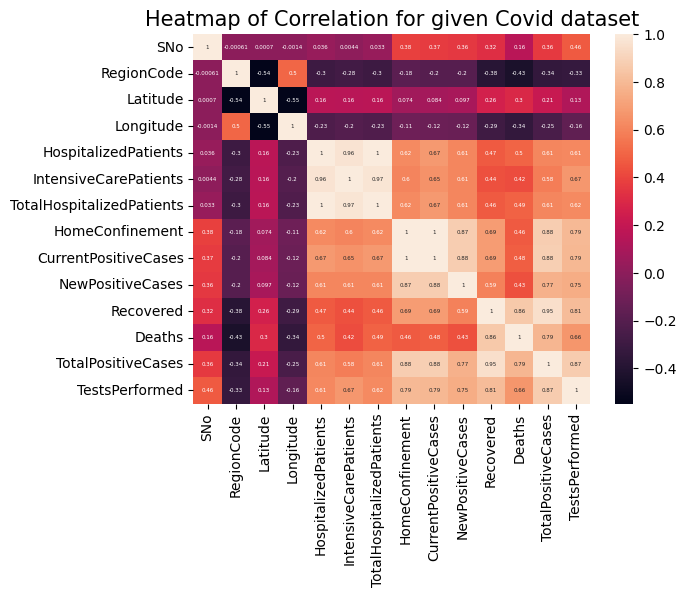

In [ ]:
#Visualizaion for Heat map
# heatmap by plt.pcolor()
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(data.corr(),annot=True, annot_kws={"fontsize":4})

plt.title('Heatmap of Correlation for given Covid dataset', fontsize=15)
plt.show() 

## More about Pandas Library method

https://pandas.pydata.org/ : Pandas official Library \\

https://nittaku.tistory.com/113 : Efficient tools

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html : 10 min to Pd


# Visualization

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import os

# 그래프 데이터 
csv_path = "/content/drive/MyDrive/AIFFEL/AMZN.csv"
df_2 = pd.read_csv(csv_path, index_col=0, parse_dates=True)
price = df_2['Close']

# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600, 2200])
plt.xlim(['2019-05-01', '2020-03-01'])

# 주석달기
important_data = [(datetime(2019, 6, 3), "Low Price"), (datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10), # 주석을 달 좌표(x,y)
                xytext=(d, price.asof(d)+100), # 주석 텍스트가 위치할 좌표(x,y)
                arrowprops=dict(facecolor='red')) # 화살표 추가 및 색 설정

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

Annotation for plot


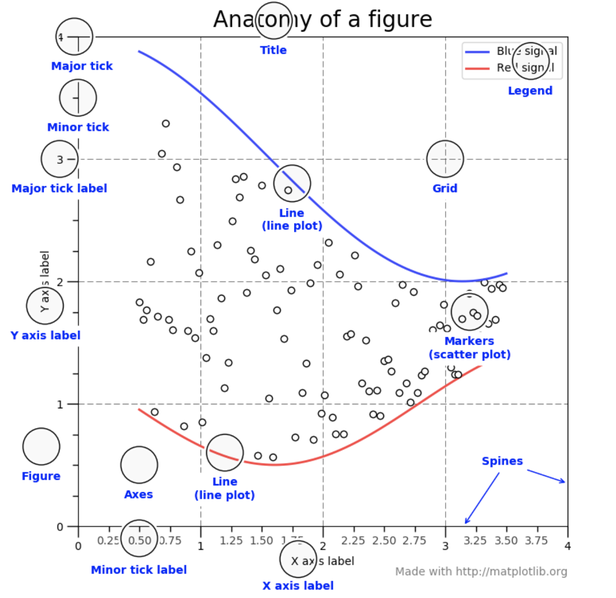

In [ ]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")
df = pd.DataFrame(tips)
print(df.info() , df.shape, sep = '/n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None/n(244, 7)


In [ ]:
print(df['sex'].value_counts())
print("===========================")
# 'time' 변수의 카테고리별 개수
print(df['time'].value_counts())
print("===========================")
# 'smoker' 변수의 카테고리별 개수
print(df['smoker'].value_counts())
print("===========================")
# 'day' 변수의 카테고리별 개수
print(df['day'].value_counts())
print("===========================")
# 'size' 변수의 카테고리별 개수
print(df['size'].value_counts())
print("===========================")

Male      157
Female     87
Name: sex, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64


In [ ]:
grouped = df['tip'].groupby(df['day'])
grouped.mean()
grouped.size()
day = dict(grouped.mean()) #to dictionary
x = list(day.keys())  
y = list(day.values())
plt.bar(x = x, height = y)
plt.ylabel('tip[$]')
plt.title('Tip by Day')
plt.show()

In [ ]:
#Seaborn
plt.title('Tip by Day')
sns.barplot(data=df, x='day', y='tip')

<Axes: xlabel='day', ylabel='tip'>

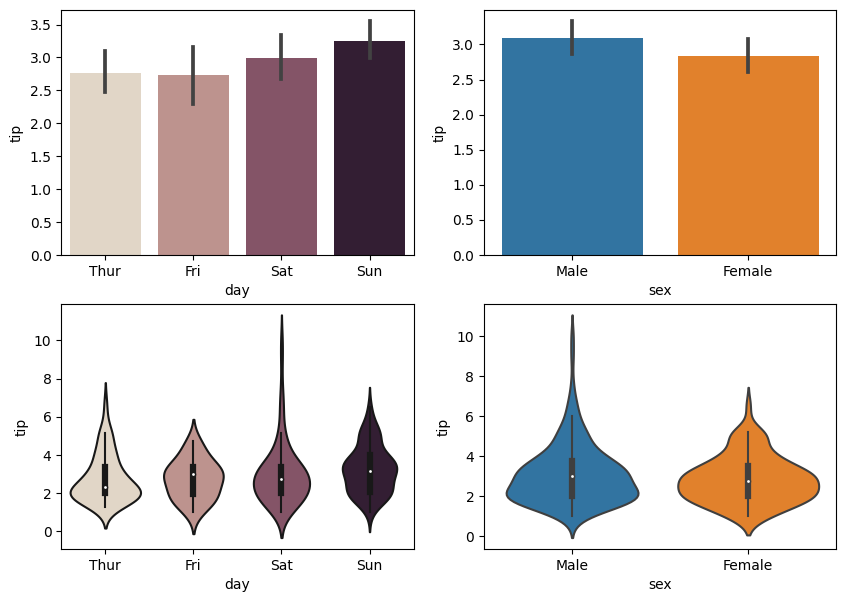

In [ ]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x='day', y='tip', palette="ch:.25")

ax2 = fig.add_subplot(2,2,2)
sns.barplot(data=df, x='sex', y='tip')

ax3 = fig.add_subplot(2,2,4)
sns.violinplot(data=df, x='sex', y='tip')

ax4 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x='day', y='tip', palette="ch:.25")

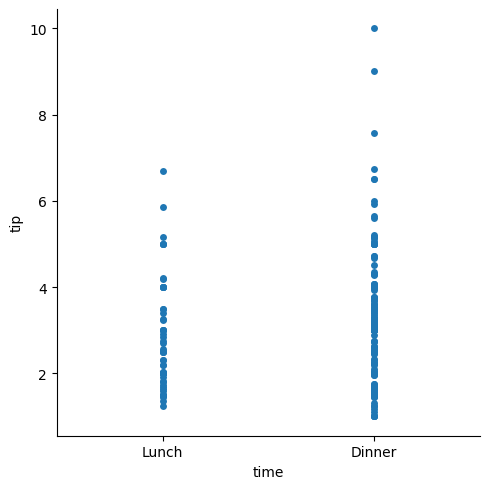

In [ ]:
sns.catplot(x="time", y="tip", jitter=False, data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

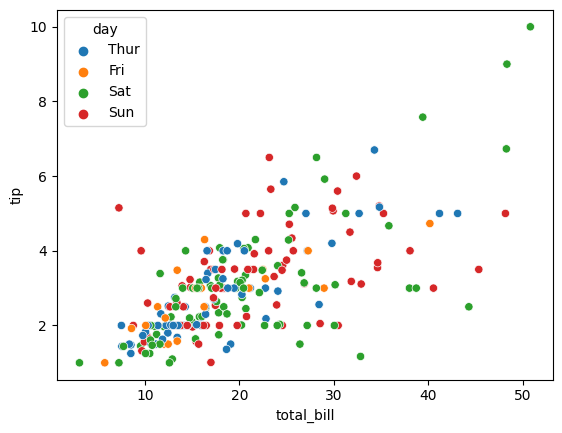

In [ ]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='day')

## Histogram

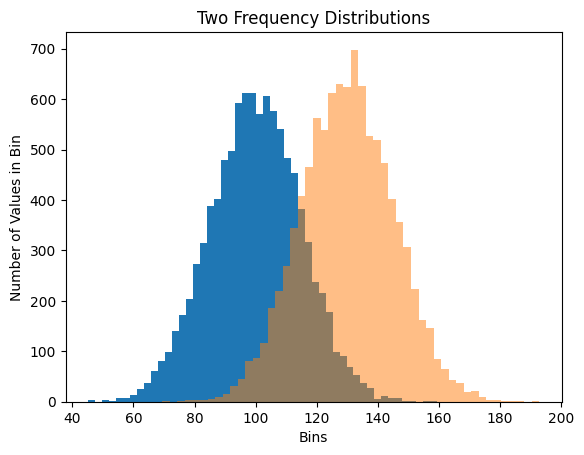

In [ ]:
import numpy as np
#그래프 데이터
mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
patches = ax1.hist(x1, bins=50, density=False)  # bins는 x값을 총 50개 구간으로 나눈다는 뜻입니다.
patches = ax1.hist(x2, bins=50, density=False, alpha=0.5)
ax1.xaxis.set_ticks_position('bottom')  # x축의 눈금을 아래 표시 
ax1.yaxis.set_ticks_position('left')  # y축의 눈금을 왼쪽에 표시

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')

# 보여주기
plt.show()

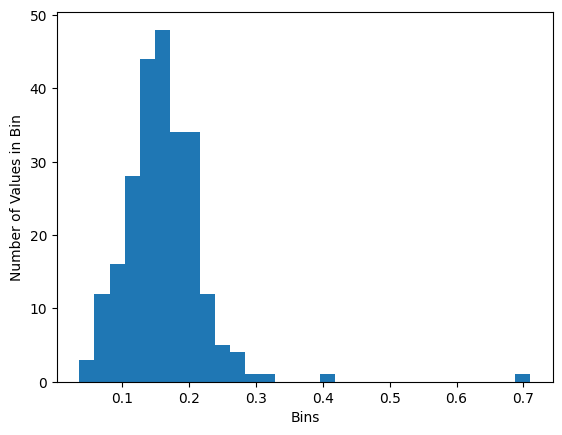

In [ ]:
#Tip ratio for given total bills

df['tip_pct'] = df['tip']/ df['total_bill']
#m = df['tip_pct'].mean()
#s = df['tip_pct'].std()
plt.hist(df['tip_pct'].values, bins=30, label='bins=30') # bins는 x값을 총 50개 구간으로 나눈다는 뜻입니다.
ax1.xaxis.set_ticks_position('bottom')  # x축의 눈금을 아래 표시 
ax1.yaxis.set_ticks_position('left')  # y축의 눈금을 왼쪽에 표시

plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')
plt.show()

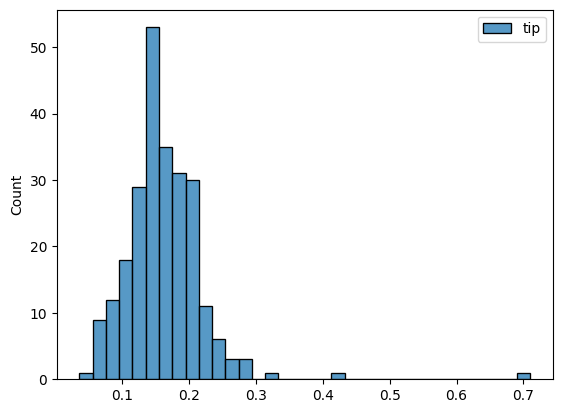

In [ ]:
sns.histplot(df['tip_pct'].values, label="tip").legend()

<Axes: ylabel='Density'>

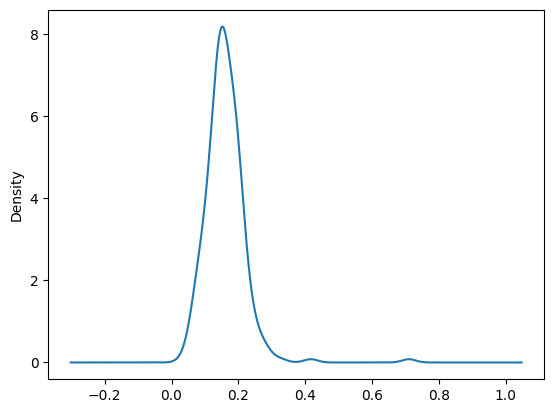

In [ ]:
#for KDE  
df['tip_pct'].plot(kind='kde')

### Passengers dataset

https://seaborn.pydata.org/tutorial/data_structure.html : about more information

<Axes: xlabel='year', ylabel='passengers'>

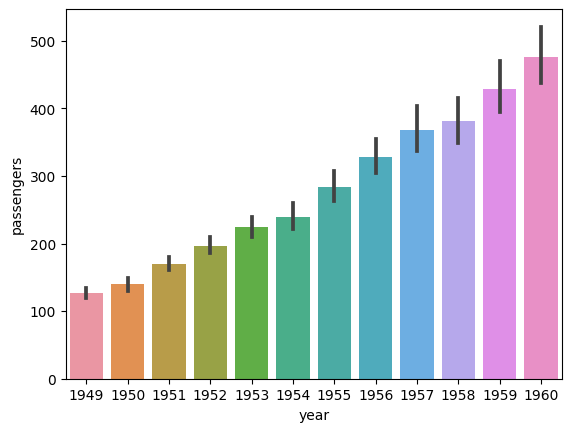

In [ ]:
flights = sns.load_dataset("flights")
flights.head()
# seaborn barplot
sns.barplot(data=flights, x='year', y='passengers')

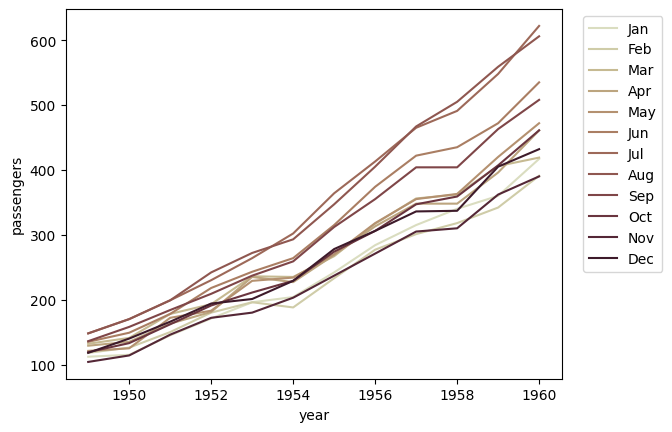

In [ ]:
sns.lineplot(data=flights, x='year', y='passengers', hue='month', palette='ch:.50')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기

### Q (5-11)

In [ ]:
# Q. 시간대(time)에 따른 tip과 total_bill의 관계를 scatter plot으로 시각화해봅시다.
sns.scatterplot(data=df, x='total_bill',y='tip',  hue='time')

# Q. seaborn jointplot의 문서를 참고하여 아래와 같은 그래프를 그려보세요!
sns.jointplot(data=df, x="total_bill", y="tip",hue='time')
plt.show()

#Scikit-Learn basic

Helpful contents

- About Feature selection basic stretagy using titanic kaggle dataset :
  - http://kaggle-kr.tistory.com/17 \\

  - YouTube : https://www.youtube.com/watch?v=sDH2zr48gTE \\


- Curse of dimensionality original paper \\
https://www.researchgate.net/publication/327498046_The_Curse_of_Dimensionality_Inside_Out
 - Theorical brief background : https://www.youtube.com/watch?v=BbYV8UfMJSA
 - Example step: https://www.youtube.com/watch?v=DyxQUHz4jWg


- Caltech Few Feature selection or feature learning perspective \\
https://www.youtube.com/watch?v=xNZQLqh0Zcc&list=PLbzf8k76xQ4UeDa8qBQXpRCMTsL5kcc5x

Scikit-Learn cheat map
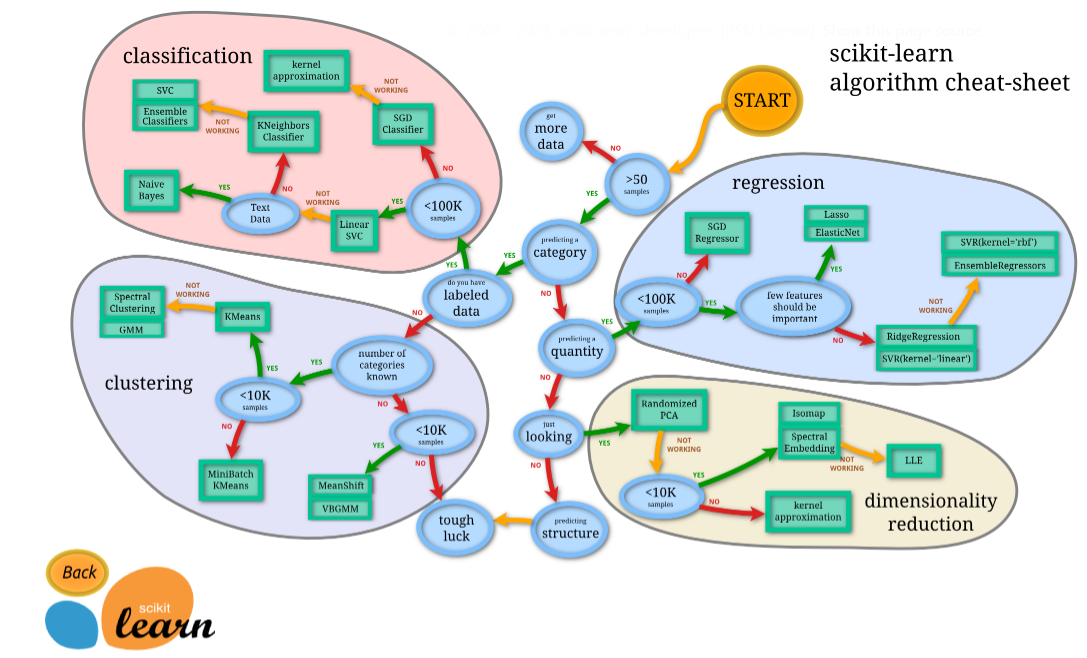

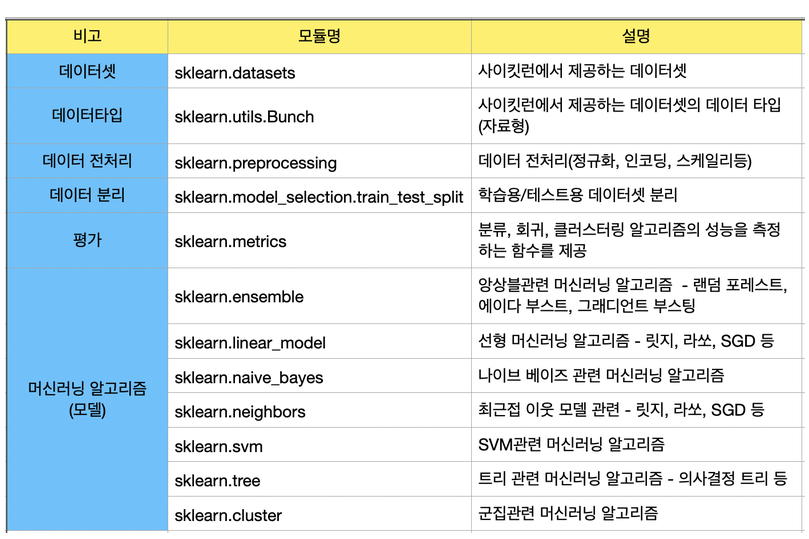

### Simple regression

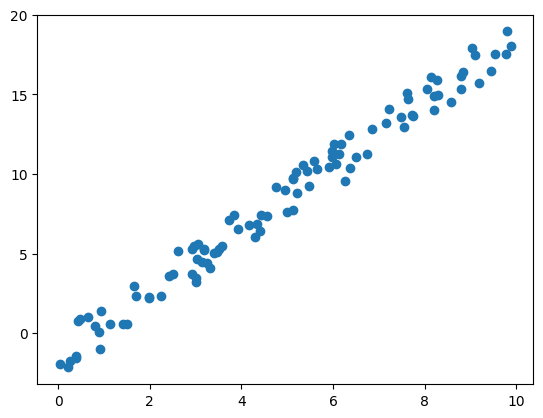

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
r = np.random.RandomState(10)
x = 10 * r.rand(100)
y = 2 * x - 3 * r.rand(100)
plt.scatter(x,y)

In [ ]:
#Shape
print(x.shape, y.shape)
#Generate regression model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model

(100,) (100,)


LinearRegression()

In [ ]:
#to array and fit
X = x.reshape(100,1)
model.fit(X,y)

LinearRegression()

86.4719257443381


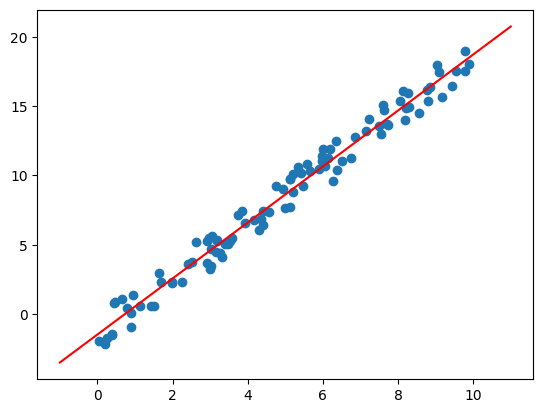

In [ ]:
x_new = np.linspace(-1, 11, 100)
X_new = x_new.reshape(-1,1)
y_new = model.predict(X_new)
#Mse error
error = mean_squared_error(y , y_new)
print(error)
#Predict mapping fnction
plt.scatter(x, y, label='input data')
plt.plot(X_new, y_new, color='red', label='regression line')

### Sklearn toy dataset for regression task

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()
type(data)
#Bunch dataset likes dictionary dataset

sklearn.utils._bunch.Bunch

Q) what is Bunch type?
see : https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html?highlight=bunch#sklearn.utils.Bunch

In [ ]:
print(data)
#key value
print(data.keys())
#data(Feature matirx)
print(data.data)
#Shape and dimension of given feature matirx 
print(data.data.shape, data.data.ndim)
#Target vector
data.target
#feature names
data.feature_names
#Want to calssify these target class
data.target_names

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
#Infomation about given dataset
print(data.DESCR)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

pd.DataFrame(data.data, columns=data.feature_names)
data = load_wine()
print(data.data.shape)
print(data.target.shape)

#Split test & train dataset

#X_train = data.data[:142]
#X_test = data.data[142:]
#print(X_train.shape, X_test.shape)
#y_train = data.target[:142]
#y_test = data.target[142:]
#print(y_train.shape, y_test.shape)

#Using Split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=42)

# model : Random Forest
model = RandomForestClassifier()
#fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#타겟 벡터 즉 라벨인 변수명 y와 예측값 y_pred을 각각 인자로 넣습니다. 
print(classification_report(y_test, y_pred))
#정확도를 출력합니다. 
print("정답률=", accuracy_score(y_test, y_pred))

(178, 13)
(178,)
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.95      0.95      0.95        43
           2       0.97      1.00      0.98        28

    accuracy                           0.96       107
   macro avg       0.96      0.97      0.96       107
weighted avg       0.96      0.96      0.96       107

정답률= 0.9626168224299065


In [ ]:
y[(0,1), t]

array([0.6, 0.5])

# Pre-precessing

In [ ]:
import os

csv_file_path = '/content/drive/MyDrive/AIFFEL/trade.csv'
trade = pd.read_csv(csv_file_path) 
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


### Capture currupted data

In [ ]:
#Missing data
print('전체 데이터 건수:', len(trade))
print('컬럼별 결측치 개수')
len(trade) - trade.count()
trade = trade.drop('기타사항', axis=1)
trade.head()
#Null data
trade.isnull().any(axis=1)

전체 데이터 건수: 199
컬럼별 결측치 개수


0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [ ]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [ ]:
'''
DataFrame의 dropna는 결측치를 삭제해 주는 메서드입니다. subset 옵션으로 특정 컬럼들을 선택했습니다.
how 옵션으로 선택한 컬럼 전부가 결측치인 행을 삭제하겠다는 의미로 'all'을 선택합니다('any': 하나라도 결측치인 경우). 
inplace 옵션으로 해당 DataFrame 내부에 바로 적용시켰습니다
'''
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)
trade.isnull().any(axis=1)
#Mean spline interpolation
trade[(trade['국가명']=='미국')&((trade['기간']=='2020년 03월')|(trade['기간']=='2020년 05월'))]
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
trade.loc[191, '무역수지'] = (trade.loc[188, '무역수지'] + trade.loc[194, '무역수지'] )/2
trade.loc[[191]]

#Cubic spline interpolation

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,1109176.5


In [ ]:
#Duplication dataset
trade.duplicated()
trade[trade.duplicated()]
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]
#Drop duplicates
trade.drop_duplicates(inplace=True)

Pandas duplicate function : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

In [ ]:
#Simple example for duplicate
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


In [ ]:
df = df.drop_duplicates(subset=['id'], keep='last')
df

,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


### Anomaly components

In [ ]:
#Normal distribution
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index
#check up
#trade.loc[outlier(trade, '무역수지', 1.5)]

def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])<= z].index

trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,1109176.5
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [ ]:
#IQR
np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))      # [8, 10, -3, -5])를 데이터 뒤에 추가함
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

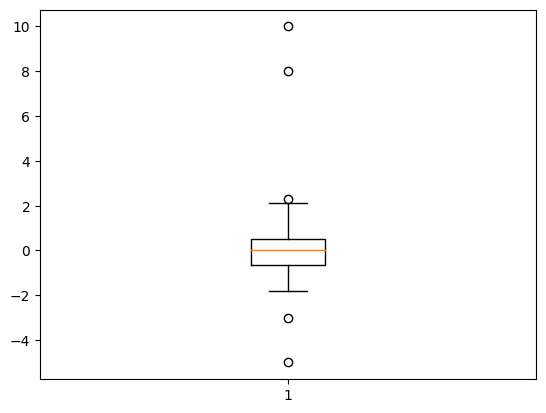

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

In [ ]:
Q3, Q1 = np.percentile(data, [75 ,25])
IQR = Q3 - Q1
print("IQR :" , IQR  , "   " "IQR partition range :", data[(Q1-1.5*IQR > data)|(Q3+1.5*IQR < data)])

IQR : 1.1644925829790964    IQR partition range : [ 2.31256634  8.         10.         -3.         -5.        ]


Cons of Z-score \\
This is troublesome, because the mean and standard deviation are highly affected by outliers – they are not robust. In fact, the skewing that outliers bring is one of the biggest reasons for finding and removing outliers from a dataset!

Three ways to detect outliers : http://colingorrie.github.io/outlier-detection.html

Detecting outlier using IQR method

In [ ]:
# Q. 사분위 범위수를 이용해서 이상치를 찾는 outlier2() 함수를 구현해보세요.
Q3, Q1 = np.percentile(trade['무역수지'], [75 ,25])
IQR = Q3 - Q1
IQR
def outlier2(df, col):
    Q3, Q1 = np.percentile(trade[col], [75 ,25])
    IQR = Q3 - Q1
    return trade.loc[df[(Q1-1.5*IQR <= df[col])& (Q3+1.5*IQR >= df[col])].index]
    
outlier2(trade, '무역수지')

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,1109176.5
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


### Normalization

- standardization\
데이터의 평균은 0, 분산은 1로 변환합니다.
Standardization은 보통 평균이 0이고 표준편차가 1일 때 사용합니다. 그렇기에 데이터가 가우시안 분포를 따를 경우 유용합니다.
- Min-max Scaling\
데이터의 최솟값은 0, 최댓값은 1로 변환합니다.
Min-Max Scaling은 피처의 범위가 다를 때 주로 사용하며 확률 분포를 모를 때 유용합니다.
- Max absolute Scaler
- RobustScaler
- Normalizer (for row data shape Normalization)

If you want to more detail, see [ https://dacon.io/codeshare/4526 ]

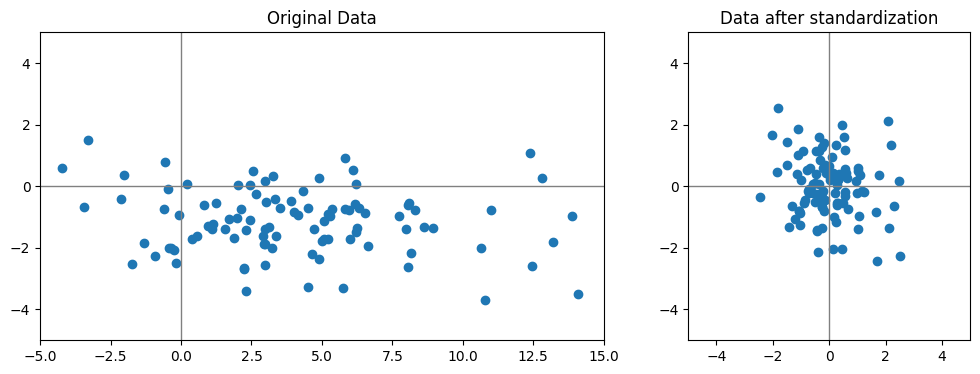

In [ ]:
#Generate random dataset
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
#Standardization
x_standardization = (x-x.mean())/x.std()
x_standardization
#min_max
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max

#distributed after standardiztion scaling method
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

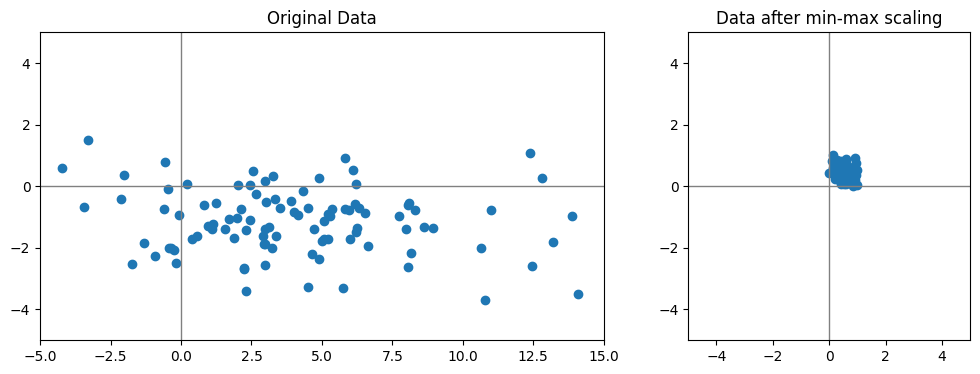

In [ ]:
#Min-max
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

In [ ]:
# Q. trade 데이터를 min-max scaling 기법으로 정규화합니다.
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_minmax = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
print(trade_minmax[cols].max())
print(trade_minmax[cols].min())
trade_minmax.head()

수출건수    1.0
수출금액    1.0
수입건수    1.0
수입금액    1.0
무역수지    1.0
dtype: float64
수출건수    0.0
수출금액    0.0
수입건수    0.0
수입금액    0.0
무역수지    0.0
dtype: float64


,수출건수,수출금액,수입건수,수입금액,무역수지
0,0.142372,0.794728,0.197014,0.700903,0.708320
1,0.035939,0.295728,0.332972,0.085394,0.496512
2,0.011187,0.042477,0.001249,0.112938,0.125310
3,0.078351,0.629759,0.099597,0.542551,0.603281
4,0.024131,0.254394,0.270146,0.000000,0.505660


In [ ]:
#MinMax for train and test
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])
# Q. train 데이터와 test 데이터에 정규화를 적용해봅시다.
train_min = train.min()
train_max = train.max()

'''
중요한 점은, test 데이터에 min-max scaling을 적용할 때도
 train 데이터 기준으로 수행해야 한다는 것입니다.
'''
train_min_max = (train - train_min)/(train_max-train_min)
test_min_max = (test - train_min)/(train_max-train_min)

In [ ]:
train_min_max

,0,1
0,0.0,0.0
1,0.5,1.0
2,1.0,0.5


In [ ]:
test_min_max

,0,1
0,-0.25,0.55
1,0.00,1.00


In [ ]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()
print(scaler.fit_transform(train) , '\n')
print(scaler.transform(test))

[[0.  0. ]
 [0.5 1. ]
 [1.  0.5]] 

[[-0.25  0.55]]


### One-hot-encoding

In [ ]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
#country.head()
#concatnate
trade = pd.concat([trade, country], axis=1)
#trade.head()
#Drop before one-hot transform layer
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국,미국,일본,중국
0,2015년 01월,116932.0,12083947.0,334522.0,8143271.0,3940676.0,0,0,1,0,0,1
1,2015년 01월,65888.0,5561545.0,509564.0,3625062.0,1936484.0,1,0,0,1,0,0
2,2015년 01월,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,0,1,0,0,1,0
3,2015년 02월,86228.0,9927642.0,209100.0,6980874.0,2946768.0,0,0,1,0,0,1
4,2015년 02월,60225.0,5021264.0,428678.0,2998216.0,2023048.0,1,0,0,1,0,0


### Binning


<Axes: >

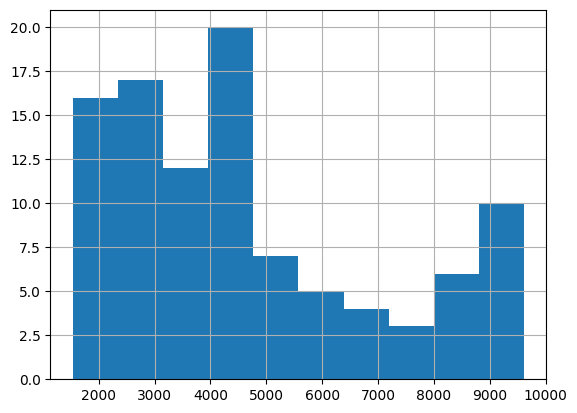

In [ ]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])

salary.hist()

In [ ]:
bins = [0, 2000, 4000, 6000, 8000, 10000]
#cutting interval w.r.t bins
ctg = pd.cut(salary, bins=bins)
print(ctg)
print('salary[0]:', salary[0])
print('salary[0]가 속한 카테고리:', ctg[0])

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64, right]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] <
                                         (8000, 10000]]
salary[0]: 4300
salary[0]가 속한 카테고리: (4000, 6000]


In [ ]:
#counts
ctg.value_counts().sort_index()

#cut by same ratio => qcut
ctg = pd.qcut(salary, q=5)
print(ctg.value_counts().sort_index())

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
dtype: int64


### Review another dataset

Dataset link : https://d3s0tskafalll9.cloudfront.net/media/documents/vgsales.csv \
About Video Game dataset

In [ ]:
csv_file_path = '/content/drive/MyDrive/AIFFEL/vgsales.csv'
sales = pd.read_csv(csv_file_path) 
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
sales.shape

(16598, 11)

# Node 8

In [3]:
import matplotlib as mpl
import numpy as np
import PIL
from google.colab import drive
drive.mount('/content/drive')
import cv2
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
path = '/content/drive/MyDrive/AIFFEL/Pokemon.csv'
poket = pd.read_csv(path)
pokemon = pd.DataFrame(poket)

In [11]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#print('슝=3')

In [12]:
pokemon.shape

(800, 13)

In [13]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()
# Q. 일반 포켓몬의 데이터셋도 만들어봅시다.
ordinary = pokemon[pokemon["Legendary"] != True].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(65, 13)
(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [17]:
#missing dataset
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [16]:
#Check columns
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [18]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [48]:
#using .unique of .nunique
print(pokemon['#'].nunique(), pokemon['Name'].nunique())
#Using property of set
print(len(set(pokemon['#'])), len(set(pokemon['Name'])))

#Unique # of Type1, 2
'''
기본적으로 nunique 함수는 NAN값을 unique value로 counting 하지 않는다, 따라서 nan값을 drop 시키지 않으려면 dropna = False 필요
'''
print(pokemon["Type 1"].nunique(),pokemon["Type 2"].nunique() ,pokemon["Type 2"].nunique(dropna = False))
print(len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"]))))

721 800
721 800
18 18 19
18 19


In [23]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [49]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Dark', 'Electric', 'Steel', 'Ice', 'Flying', 'Grass', 'Fighting', 'Bug', 'Fire', 'Ghost', 'Water', 'Dragon', 'Poison', 'Normal', 'Rock', 'Ground', 'Fairy', 'Psychic']


In [52]:
#counting Nan value
pokemon["Type 2"].isna().sum()

386

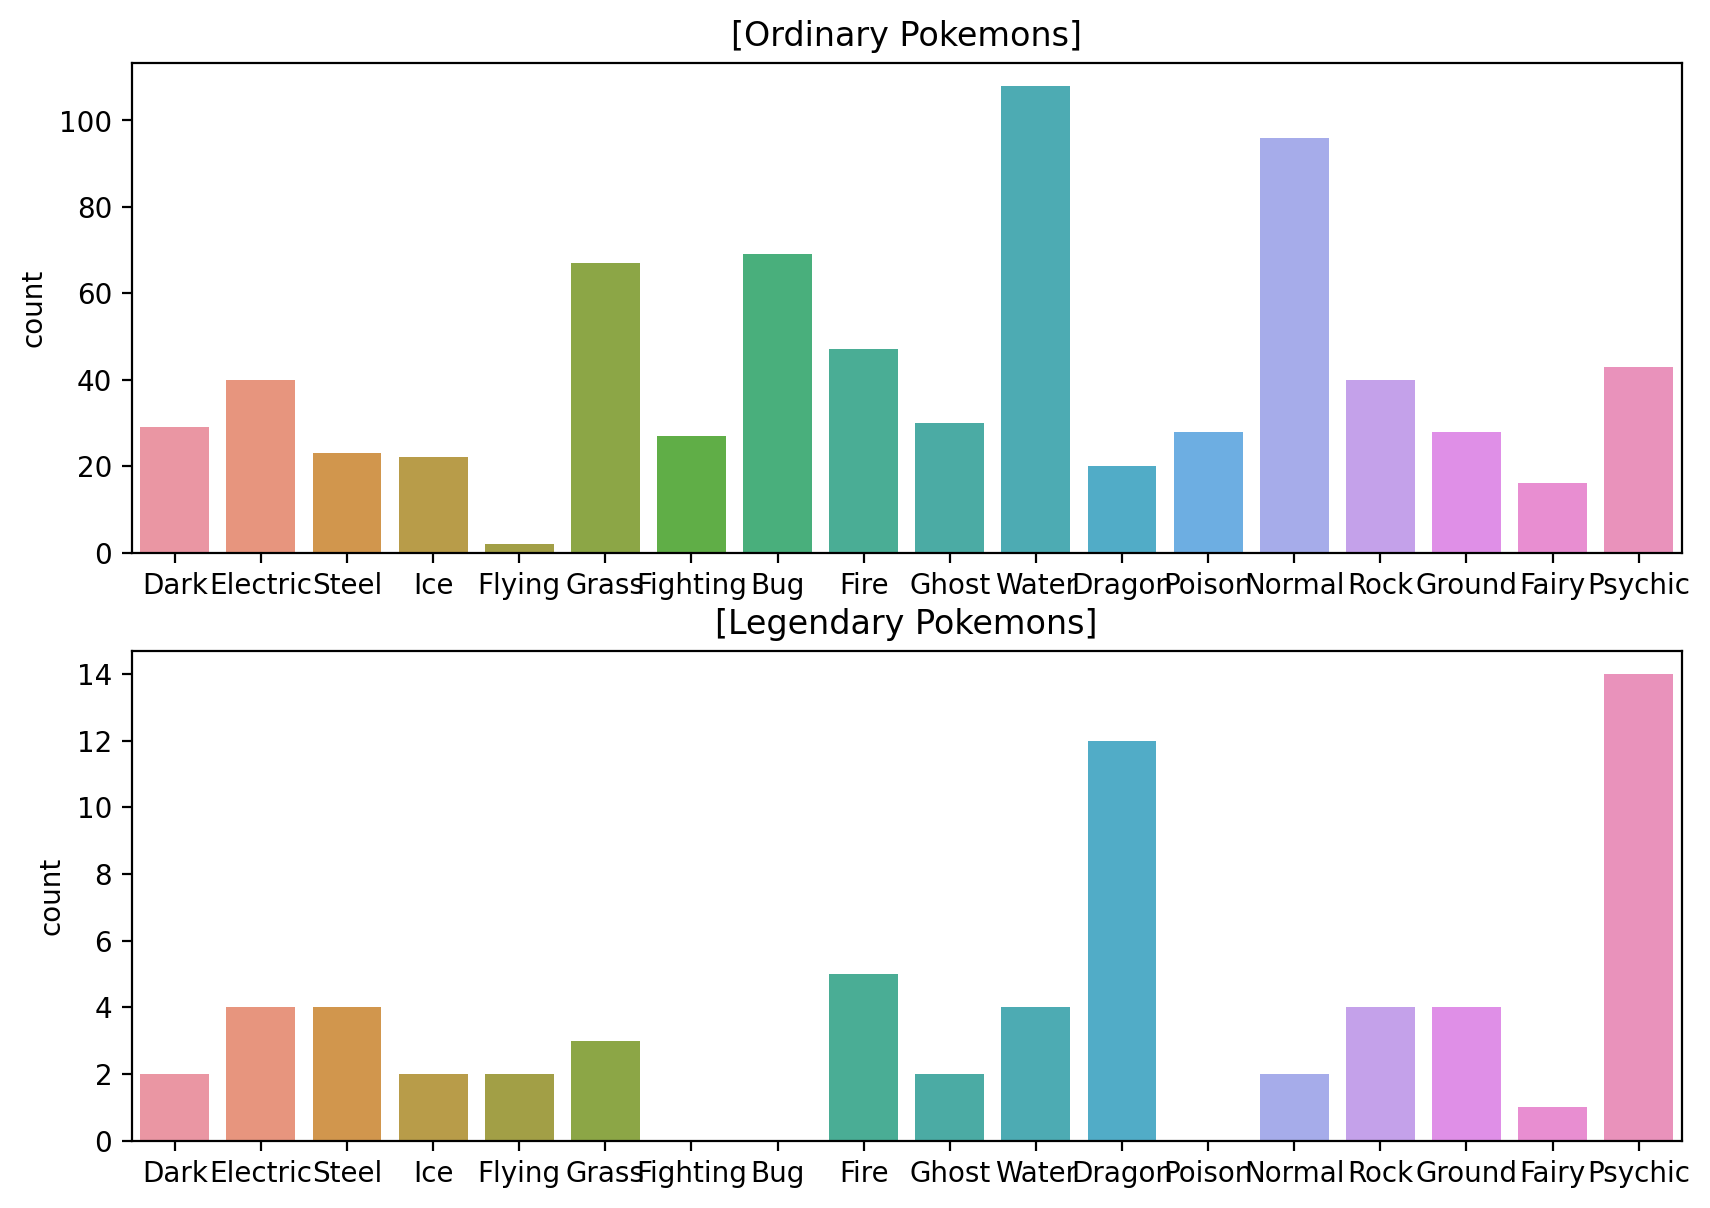

In [57]:
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

In [58]:
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


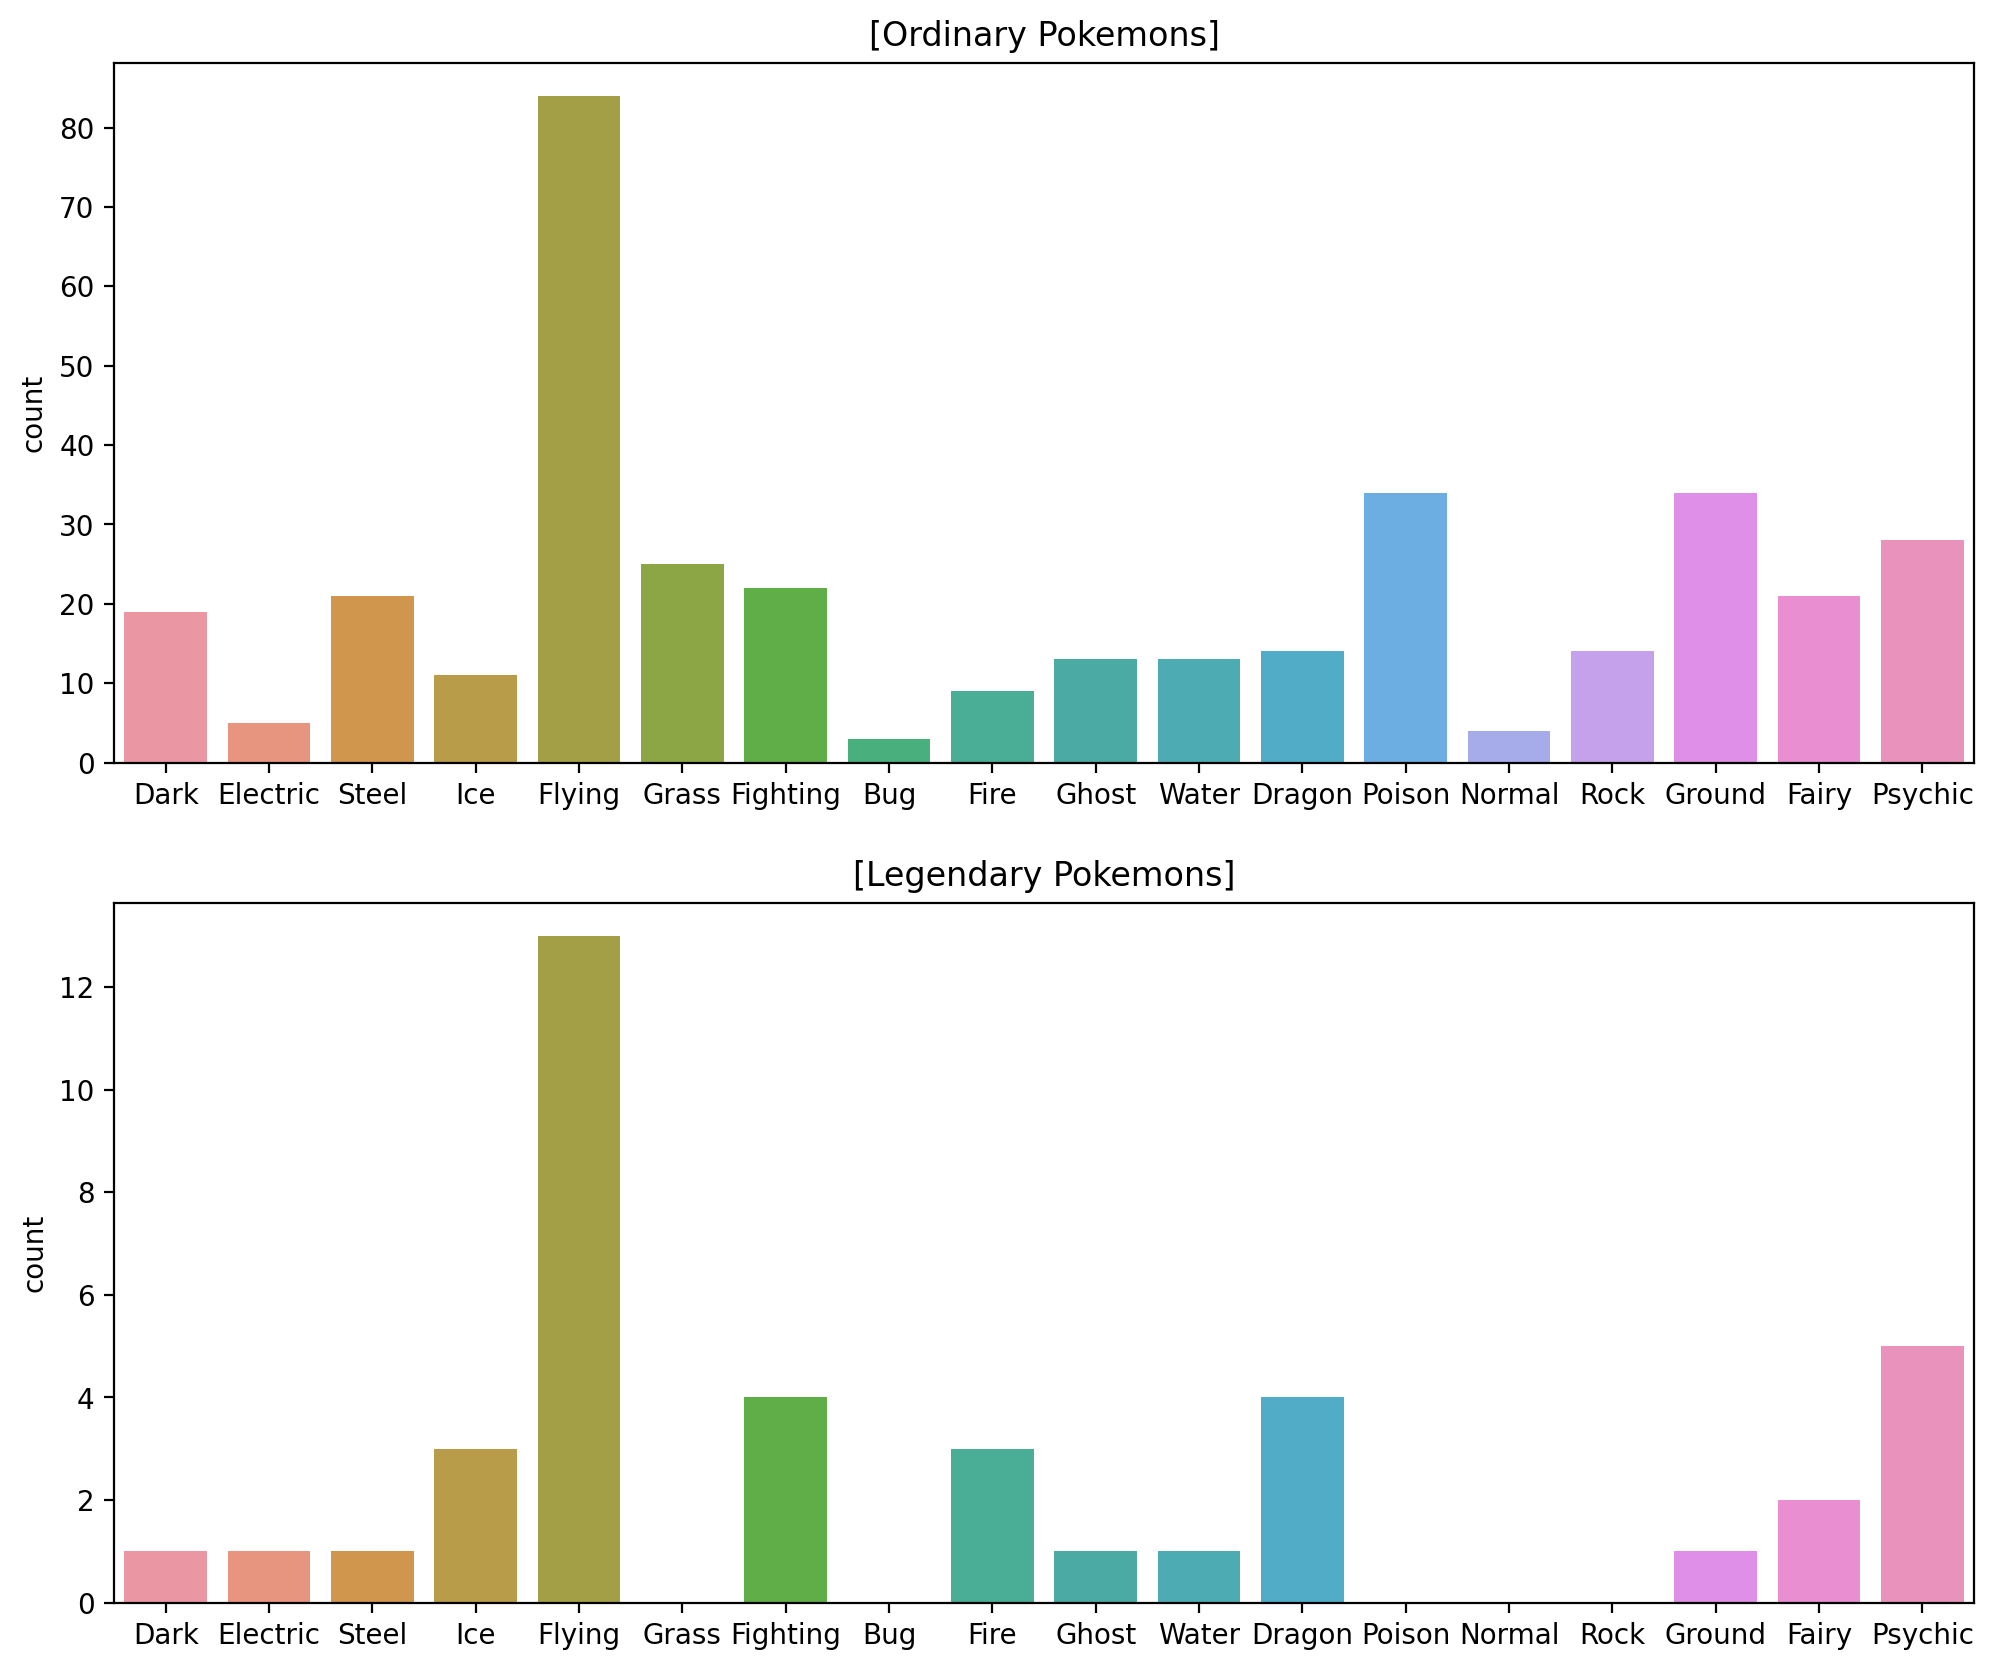

In [60]:
#type2 
# Q. 아래 코드의 빈칸을 채워주세요.
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.title("[Legendary Pokemons]")

plt.show()

In [61]:
# Q. Type 2에 대해서도 피벗 테이블을 만들어봅시다.
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


In [63]:
#Pick stats
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))
#Checking total pokemon
print((pokemon['Total'].values ==  pokemon[stats].values.sum(axis = 1)).sum())

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318
800


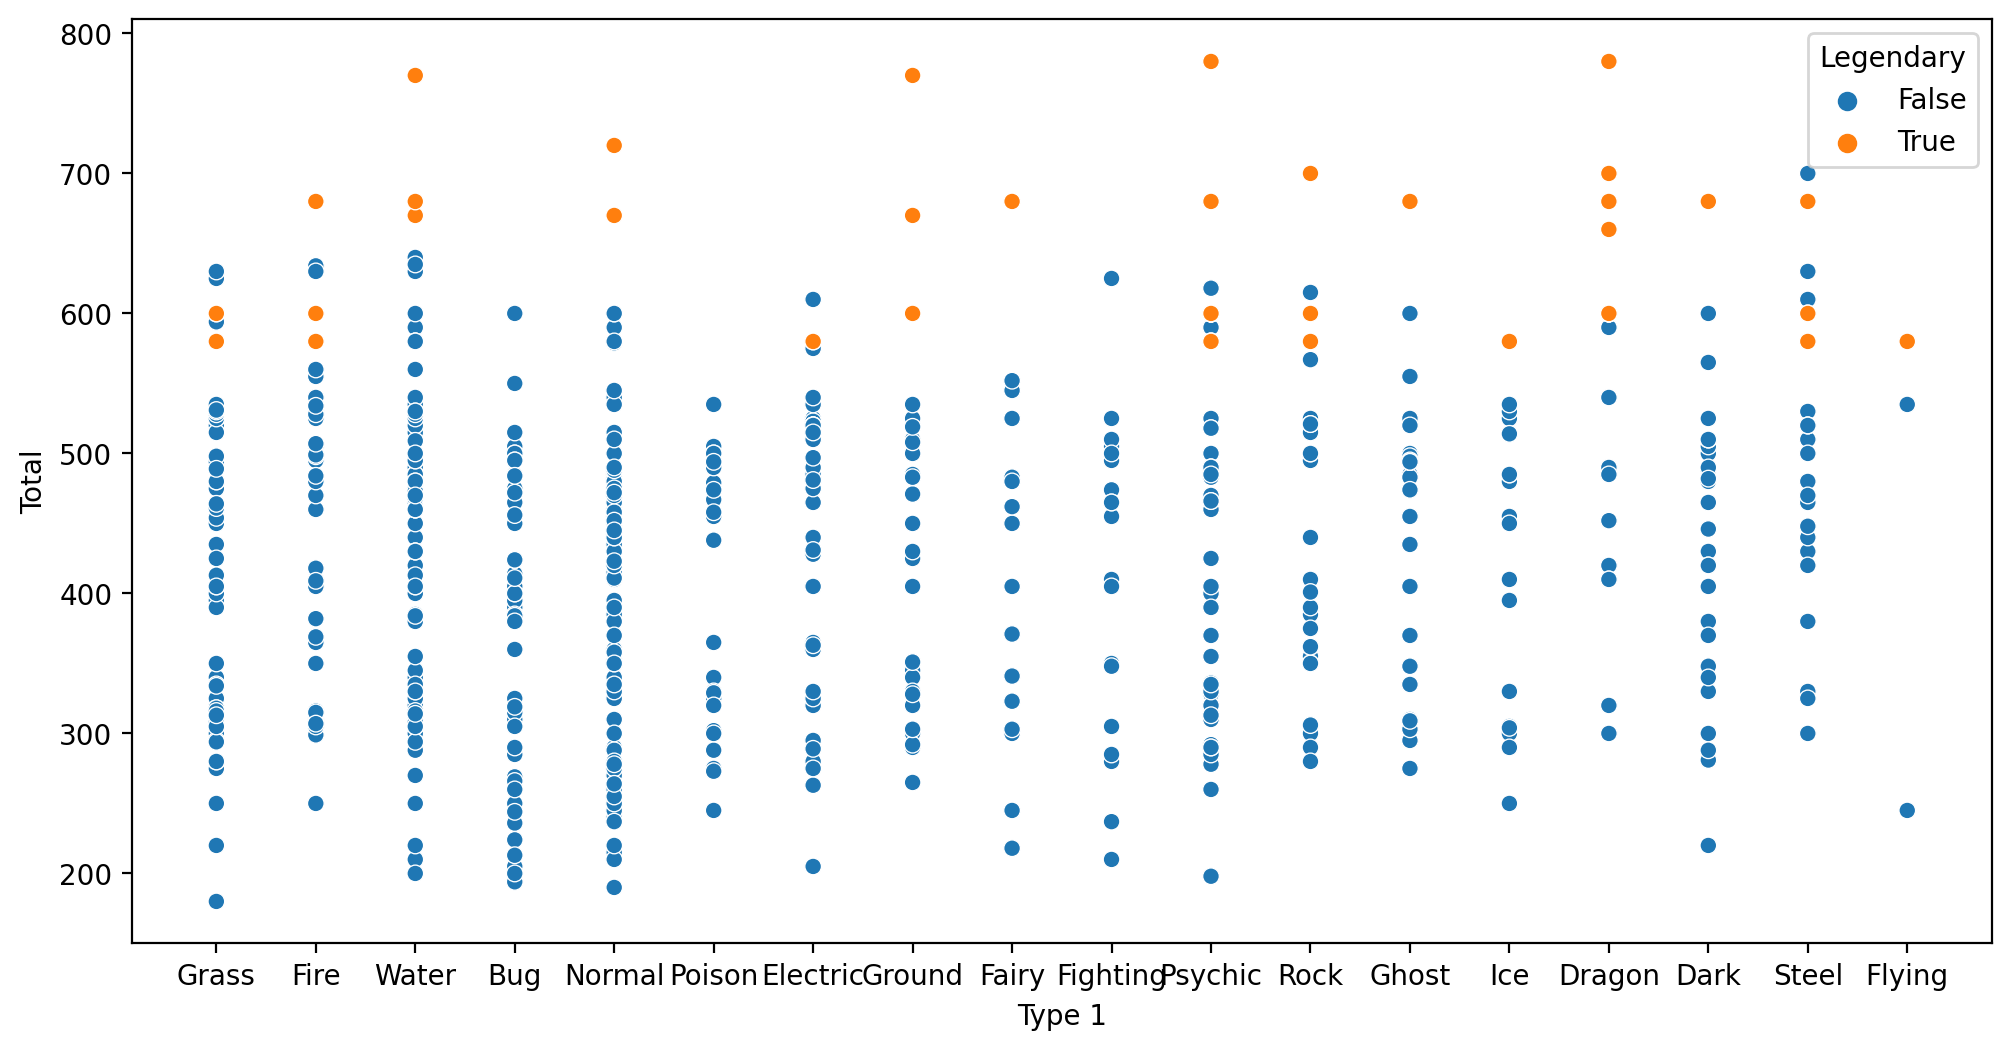

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

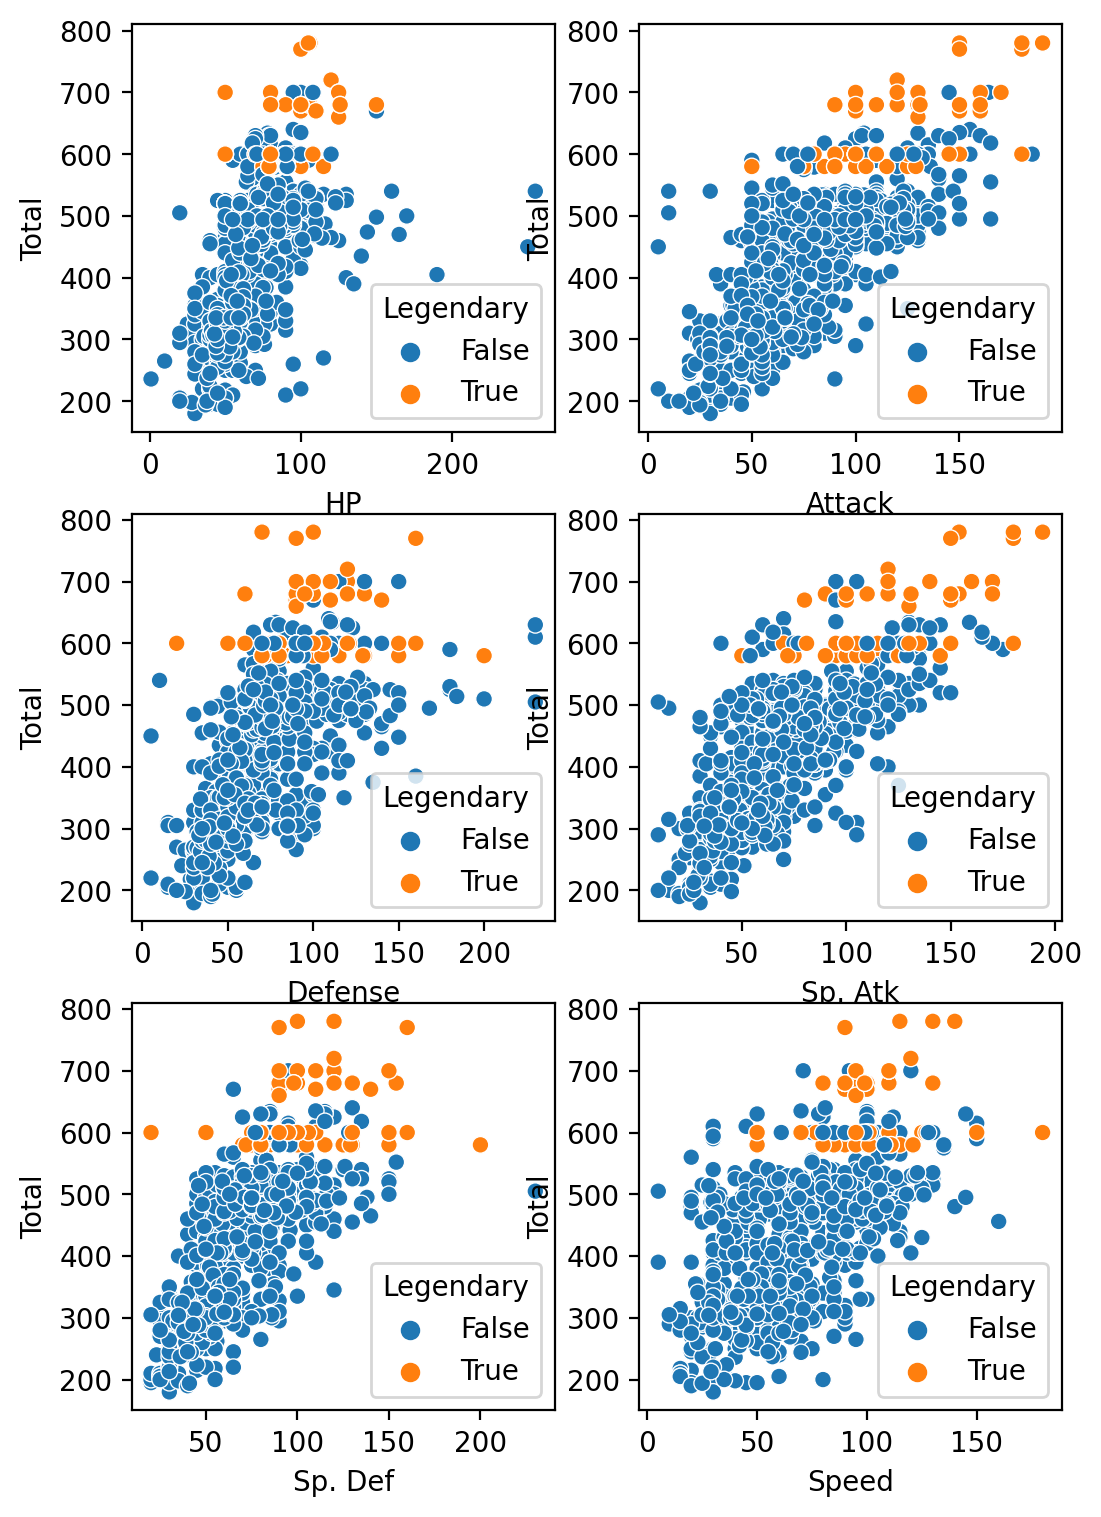

In [70]:
# Q. 다음 코드의 빈칸을 채워주세요.
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현합니다.

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(6, 9)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

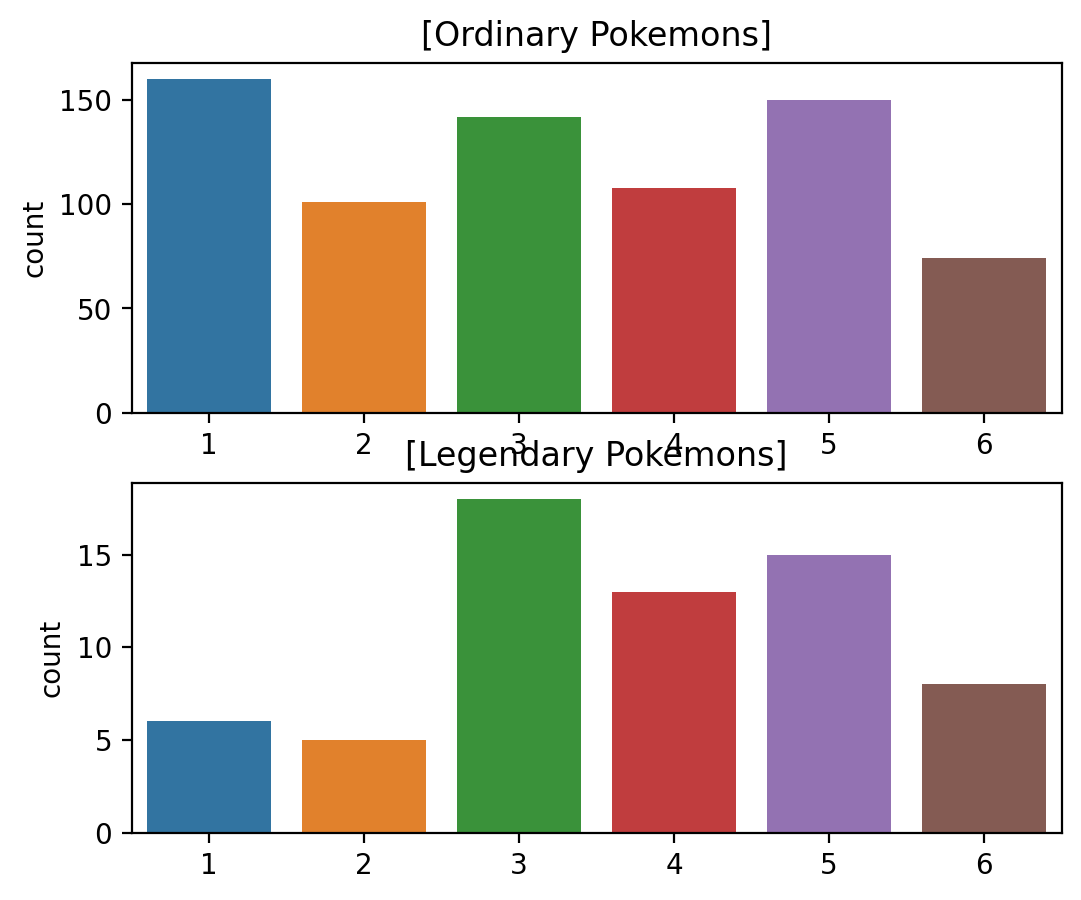

In [69]:
#Generation
plt.figure(figsize=(6, 5))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

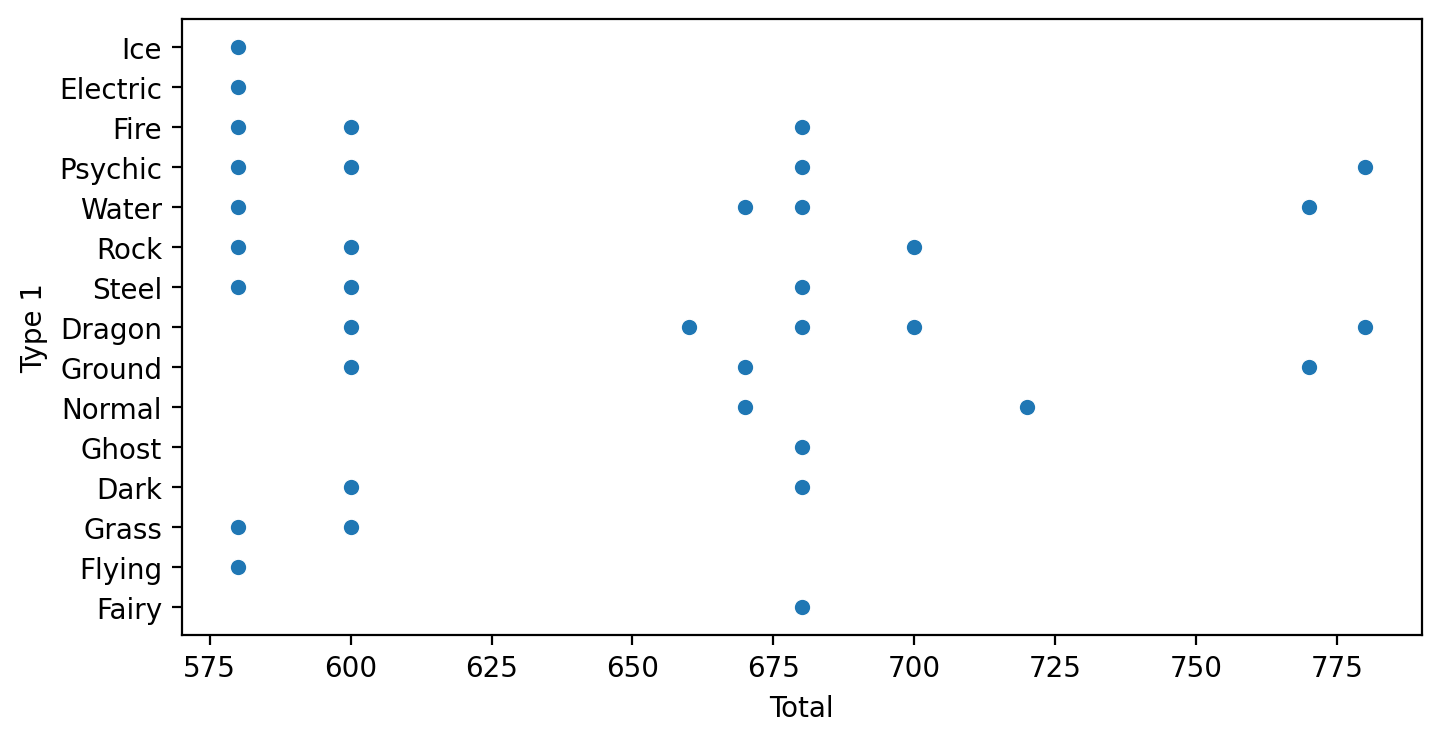

In [71]:
#Total stats
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [72]:
#print(sorted(list(set(legendary["Total"]))))
print(list(legendary["Total"].unique()))

[580, 680, 780, 600, 700, 670, 770, 720, 660]


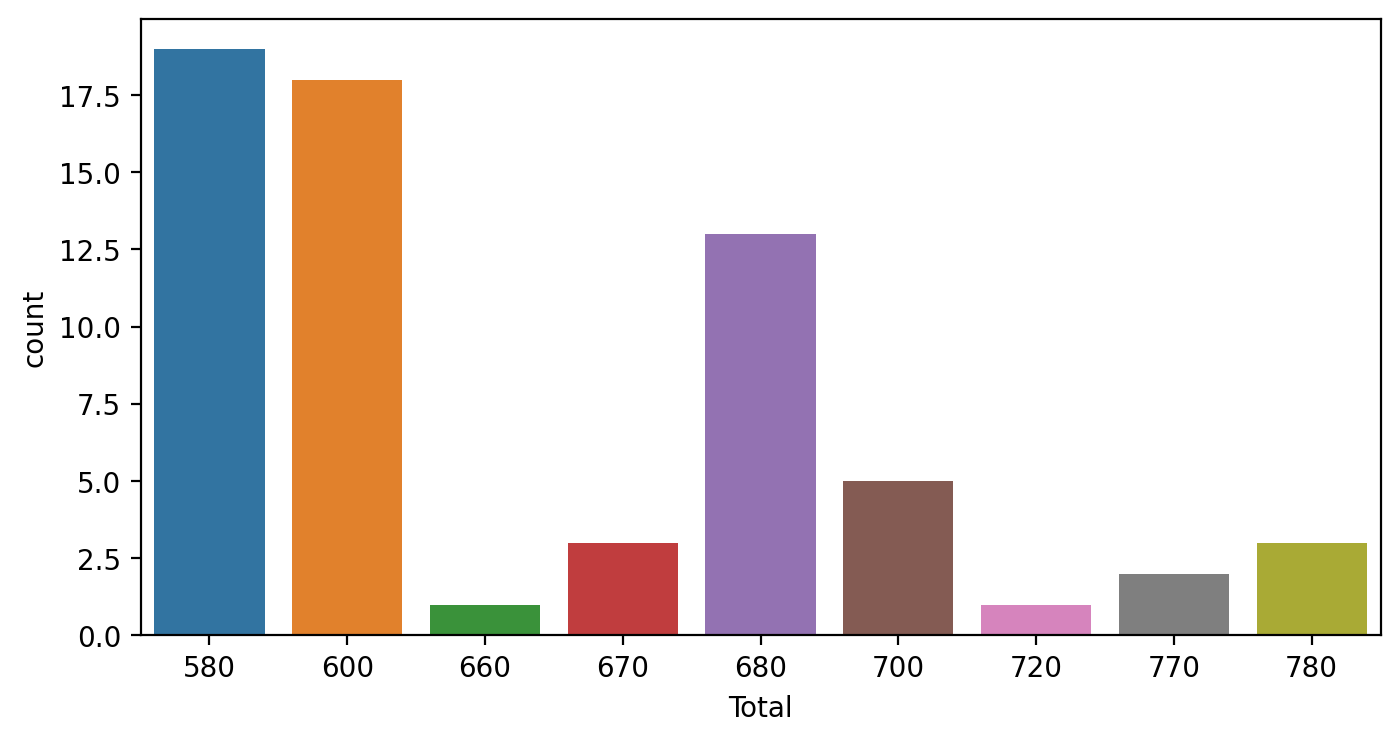

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [74]:
round(65 / 9, 2)

7.22

In [76]:
# Q. ordinary 포켓몬의 'Total' 값 집합을 확인해봅시다.
#print(sorted(list(set(ordinary["Total"]))))
print(list(ordinary["Total"].unique()))
# Q. 이 집합의 크기(길이)를 확인해봅시다.
#print(len(sorted(list(set(ordinary["Total"])))))
print(ordinary["Total"].nunique())

[318, 405, 525, 625, 309, 534, 634, 314, 530, 630, 195, 205, 395, 495, 251, 349, 479, 579, 253, 413, 262, 442, 288, 438, 320, 485, 300, 450, 275, 365, 505, 273, 323, 483, 299, 270, 435, 245, 455, 490, 285, 305, 265, 290, 440, 500, 350, 555, 385, 510, 310, 400, 590, 390, 335, 515, 410, 315, 325, 465, 352, 460, 475, 600, 328, 330, 480, 520, 425, 340, 345, 295, 200, 540, 640, 535, 355, 615, 420, 215, 415, 250, 218, 210, 470, 280, 610, 360, 180, 430, 336, 380, 700, 635, 220, 240, 198, 278, 518, 618, 269, 414, 670, 266, 456, 236, 237, 474, 190, 375, 260, 575, 302, 467, 560, 458, 468, 308, 565, 580, 194, 384, 263, 363, 523, 224, 424, 244, 482, 348, 498, 452, 329, 411, 454, 334, 494, 594, 545, 528, 418, 255, 370, 281, 446, 316, 292, 487, 264, 358, 488, 497, 313, 508, 445, 294, 509, 351, 519, 461, 303, 401, 567, 473, 428, 464, 319, 472, 489, 471, 484, 550, 307, 409, 423, 382, 499, 213, 369, 507, 371, 552, 531, 466, 448, 341, 462, 306, 289, 481, 362, 521, 431, 304, 514]
195


In [77]:
round(735 / 195, 2)

3.77

In [78]:
#Apply name counts
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()
# Q. ordinary 포켓몬의 데이터에도 'name_count' 값을 추가해줍시다.
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


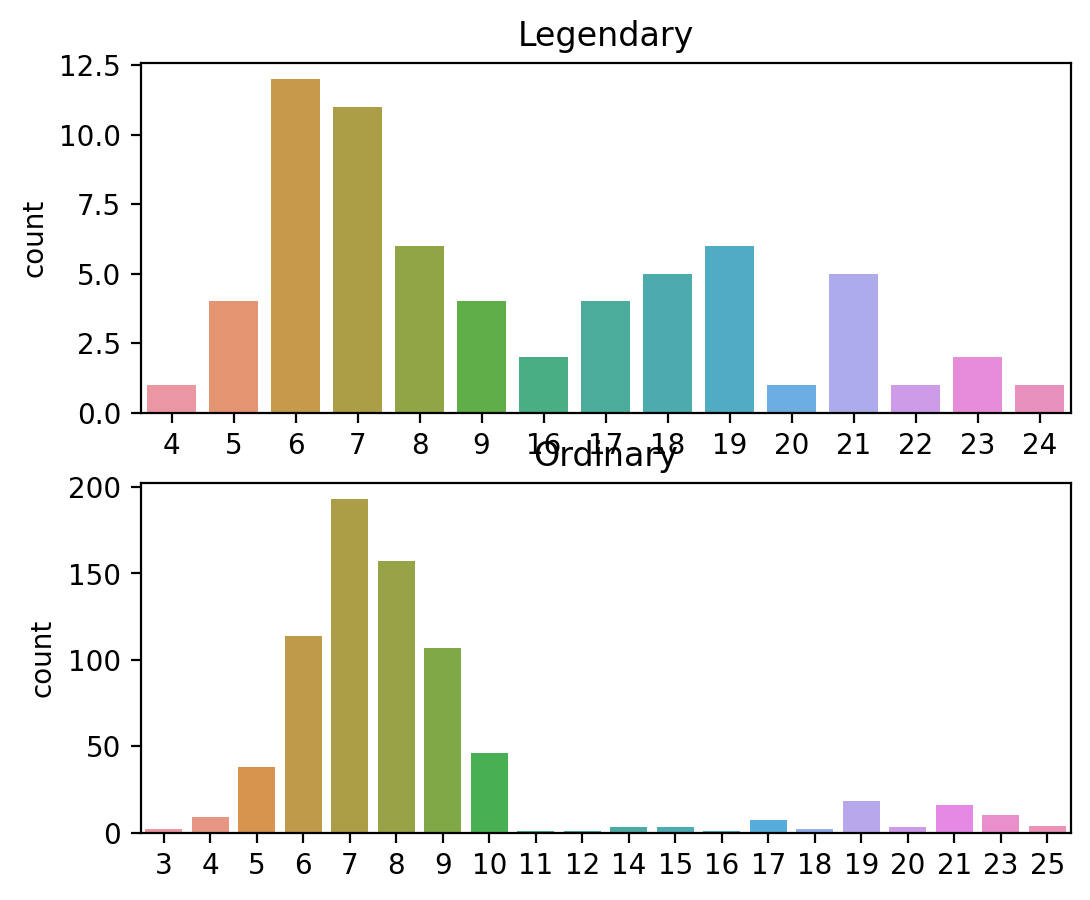

In [81]:
plt.figure(figsize=(6, 5))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [82]:
#proportion
print("Legendary type :" , round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")
# Q. 일반 포켓몬의 이름이 10글자 이상일 확률을 구해보세요.
print("Ordinary type :", round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

Legendary type : 41.54 %
Ordinary type : 15.65 %


In [83]:
'''
Q.How about pick i which represent best difference of between two categories name length?
For instead of pick 10, we pick best diffence parameter like n = 14 case
'''
for i in range (20):
  print(abs(round(len(legendary[legendary["name_count"] > i]) / len(legendary) * 100, 2) - round(len(ordinary[ordinary["name_count"] > i]) / len(ordinary) * 100, 2)))

0.0
0.0
0.0
0.269999999999996
0.04000000000000625
1.019999999999996
3.969999999999999
5.359999999999999
17.49
25.89
32.15
32.29
32.42
32.42
32.83
33.239999999999995
30.3
25.1
17.68
10.89


In [84]:
#Injection Long name feature
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


In [85]:
#Checking name is whether pure alpha? => using isalpha() function

#repalce " " => "" 
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [86]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [87]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [88]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [89]:
# Q. 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크해봅시다.
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


In [91]:
import re
#Split and Tokenizer
# Q. 다음 코드의 빈칸을 채워주세요.
def tokenize(name):
    tokens = []
    name_split = name.split(" ")
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
    return np.array(tokens)

name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [92]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

### Counter example
https://docs.python.org/3/library/collections.html#counter-objects : counter function

In [94]:
'''
list 또는 set의 자료형에서 각 요소의 개수를 다루고 싶을 때에는 파이썬의 collection이라는 패키지를 사용하면 편리합니다.
collection은 순서가 있는 딕셔너리인 OrderedDict, 요소의 개수를 카운트하는 Counter 등 여러 다양한 모듈을 제공합니다.

이 중 우리는 토큰이 사용된 개수를 알고 싶기 때문에 Counter 객체를 사용할 것입니다.
'''
from collections import Counter
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [95]:
#가장 많은것부터 decensing 하게 array
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [96]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [97]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


### 1-hot-encoding

In [98]:
#One hot encoding 
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Dark,Electric,Steel,Ice,Flying,Grass,Fighting,Bug,Fire,Ghost,Water,Dragon,Poison,Normal,Rock,Ground,Fairy,Psychic
0,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
1,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
2,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
3,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [112]:
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Dark,Electric,Steel,Ice,Flying,Grass,Fighting,Bug,Fire,Ghost,Water,Dragon,Poison,Normal,Rock,Ground,Fairy,Psychic
0,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
1,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
2,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
3,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [111]:
pokemon[["Type 1", "Type 2"] + types].head()

,Type 1,Type 2,Dark,Electric,Steel,Ice,Flying,Grass,Fighting,Bug,Fire,Ghost,Water,Dragon,Poison,Normal,Rock,Ground,Fairy,Psychic
0,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
1,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
2,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
3,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [115]:
original_data = pd.read_csv(path)
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [117]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### Training loop

In [118]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [119]:
target = 'Legendary'

In [120]:
#Handling X, y dataset
# Q. 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장합니다.
X = original_data[features]
print(X.shape)
X.head()

# Q. 'target' 컬럼의 데이터를 변수 'y'에 저장합니다.
y = original_data[target]
print(y.shape)
y.head()

(800, 8)
(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [121]:
#Split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)


array([[144,   3],
       [  5,   8]])

In [123]:
'''
위 값은 왼쪽 위부터 순서대로 TN, FP, FN, TP를 나타냅니다.
우리의 데이터에서는 Positive는 Legendary=True(전설의 포켓몬), Negative는 Legendary=False(일반 포켓몬)를 나타냅니다.

즉, 위 수치를 해석해 보면 다음과 같죠.

TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.
FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.
FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.
TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.
흠, 총 160개의 학습 데이터 중 FP와 FN은 합쳐서 8개뿐이니 나쁘지 않은 결과라고 할 수 있습니다.
'''
#Recall score

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [126]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

37

In [127]:
# Q. 사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
X = pokemon[features]
print(X.shape)
X.head()
# Q. 정답 데이터 'y'도 'target' 변수를 이용해 만들어줍시다.
y = pokemon[target]
print(y.shape)
y.head()

(800, 37)
(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 37) (640,)
(160, 37) (160,)


In [129]:
model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       147
        True       0.71      0.92      0.80        13

    accuracy                           0.96       160
   macro avg       0.85      0.94      0.89       160
weighted avg       0.97      0.96      0.96       160



In [130]:
confusion_matrix(y_test, y_pred)

array([[142,   5],
       [  1,  12]])

In [144]:
#Injection Long name feature
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon["long_name"] = pokemon["name_count"] >= 14

# Q. 사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
X = pokemon[features]
print(X.shape)
# Q. 정답 데이터 'y'도 'target' 변수를 이용해 만들어줍시다.
y = pokemon[target]
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

(800, 37)
(800,)


In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       147
        True       0.71      0.92      0.80        13

    accuracy                           0.96       160
   macro avg       0.85      0.94      0.89       160
weighted avg       0.97      0.96      0.96       160



In [142]:
pokemon["long_name"].sum()

93